# Hierarchical Clustering

## Library 임포트

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## dataset 읽어오기

In [4]:
df = pd.read_csv('../data/Mall_Customers.csv')

In [5]:
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
X = df.loc[ : ,  'Genre' :  ]

In [7]:
X.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [8]:
X['Genre'].nunique()

2

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [12]:
X['Genre'] = encoder.fit_transform( X['Genre'] )

In [13]:
X.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


## Dendrogram 을 그리고, 최적의 클러스터 갯수를 찾아보자.

In [14]:
import scipy.cluster.hierarchy as sch

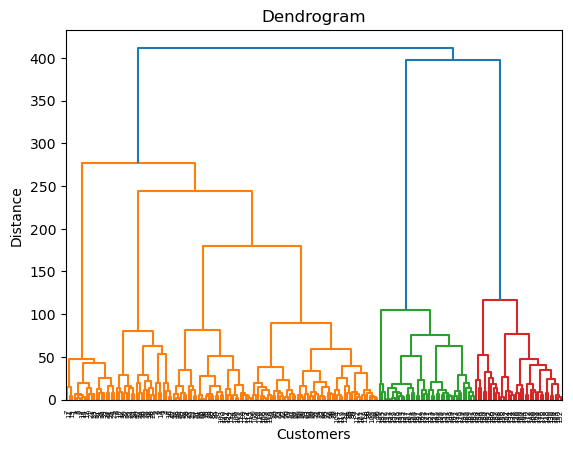

In [19]:
sch.dendrogram( sch.linkage(X , method='ward') )
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

## Training the Hierarchical Clustering model

In [20]:
# k : 6

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hc = AgglomerativeClustering(n_clusters= 6)

In [24]:
y_pred = hc.fit_predict(X)

In [26]:
df['Group'] = y_pred

In [27]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


## 그루핑 정보를 확인

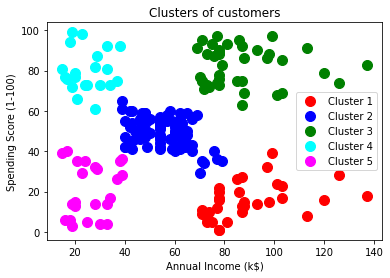

In [5]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 그룹 정보를 데이터셋에 추가

## 마케팅 이메일을 보내기 위해, 3번 그룹의 고객들만 가져와보자. 